# Notebook #5: Series temporales: predicción a futuro del parque vehicular; Prophet

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
from prophet import Prophet

# Importar las clases
# -----------------------------------------------------------------------
import sys
sys.path.append('../..')
from src import soporte_temporales as st
from src import soporte_sarima as ss
from src import soporte_funciones_BBDD as sfbd
from src import soporte_variables_vehiculos as svv

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA



# Visualizar las métricas de error en y_test
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuraciones
# -----------------------------------------------------------------------
pd.options.display.float_format = '{:.0f}'.format
from itertools import product

%load_ext autoreload
%autoreload 2

# Modelo Prophet

In [2]:
df_autos_historicos = sfbd.dbeaver_fetch(sfbd.dbeaver_conexion("proyecto_final"),svv.query_autos_historico)

In [3]:
df_autos_historicos.columns = ['FECHA', 'Vehículos']
df_autos_historicos['FECHA'] = pd.to_datetime(df_autos_historicos['FECHA'].astype(str) + '-12-31')

In [4]:
df_autos_historicos.columns = ['ds', 'y']

In [5]:
df_autos_historicos.set_index('ds', inplace=True)

### Cálculo de baseline

In [8]:
df_autos_historicos['prev'] = df_autos_historicos['y'].shift(1)
df_autos_historicos['ape'] = (df_autos_historicos['prev'] - df_autos_historicos['y']).abs() / df_autos_historicos['y'].astype(float)

In [9]:
train_size = int(0.7 * len(df_autos_historicos))
y_train, y_test = df_autos_historicos[:train_size], df_autos_historicos[train_size:]

In [10]:
y_test['ape'].mean()

0.05812037163672062

    - El MAPE ofrecido por como baseline es de 5.8%. Esto viene de tomar como referencia para la predicción del siguiente año, al año actual.

In [11]:
df_autos_historicos.drop(columns=['prev', 'ape'], inplace=True)
y_train.drop(columns=['prev', 'ape'], inplace=True)
y_test.drop(columns=['prev', 'ape'], inplace=True)

In [12]:
df_autos_historicos.reset_index(inplace=True)

In [13]:
m = Prophet()
m.fit(df_autos_historicos)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=2, freq='Y') 
m.predict(future)

15:21:42 - cmdstanpy - INFO - Chain [1] start processing
15:21:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-12-31,786453,915473,1018912,786453,786453,179954,179954,179954,179954,179954,179954,0,0,0,966407
1,1999-12-31,929288,1079534,1180072,929288,929288,195689,195689,195689,195689,195689,195689,0,0,0,1124978
2,2000-12-31,1072515,1218203,1320179,1072515,1072515,195471,195471,195471,195471,195471,195471,0,0,0,1267986
3,2001-12-31,1215321,1341400,1446555,1215321,1215321,179887,179887,179887,179887,179887,179887,0,0,0,1395208
4,2002-12-31,1345319,1474360,1578182,1345319,1345319,179954,179954,179954,179954,179954,179954,0,0,0,1525273
5,2003-12-31,1475178,1619431,1721699,1475178,1475178,195689,195689,195689,195689,195689,195689,0,0,0,1670867
6,2004-12-31,1605392,1749687,1848862,1605392,1605392,195471,195471,195471,195471,195471,195471,0,0,0,1800863
7,2005-12-31,1735251,1866484,1966528,1735251,1735251,179887,179887,179887,179887,179887,179887,0,0,0,1915138
8,2006-12-31,1865242,1992614,2096748,1865242,1865242,179954,179954,179954,179954,179954,179954,0,0,0,2045196
9,2007-12-31,2033863,2178328,2279637,2033863,2033863,195689,195689,195689,195689,195689,195689,0,0,0,2229552


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
24,2022-12-31,5496052,5443083,5545527
25,2023-12-31,5807581,5756142,5854811
26,2024-12-31,6103968,6047504,6153621
27,2025-12-31,6384178,6330872,6434441
28,2026-12-31,6680039,6622003,6737116


In [15]:
df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df['autos'] = df_autos_historicos['y']
df = df[df['autos'].notnull() & df['yhat'].notnull()]
df.head(5)

,ds,yhat,yhat_lower,yhat_upper,autos
0,1998-12-31,966407,913105,1014010,936083
1,1999-12-31,1124978,1076656,1173755,1090833
2,2000-12-31,1267986,1217730,1314709,1294998
3,2001-12-31,1395208,1343435,1443549,1436165
4,2002-12-31,1525273,1471948,1572241,1611023


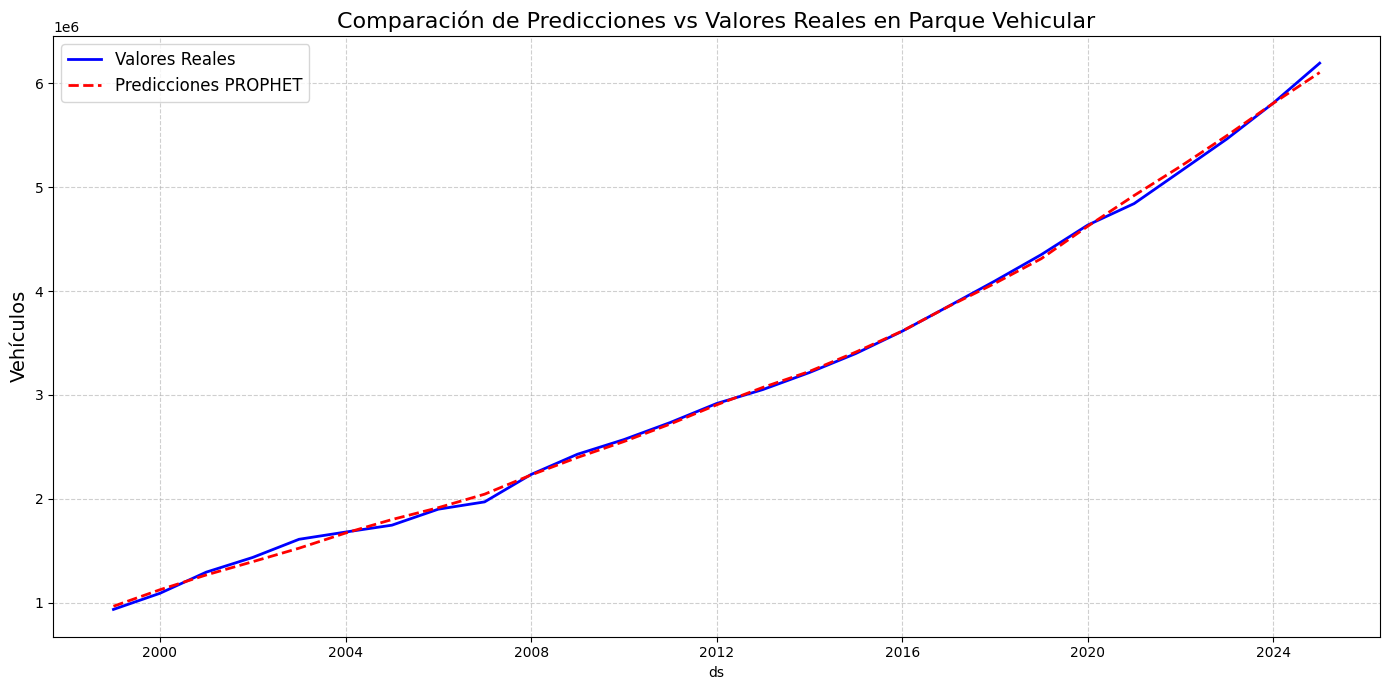

In [16]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x="ds", y="autos", label="Valores Reales", color="blue", linewidth=2) # valores reales
sns.lineplot(data=df, x="ds", y="yhat", label="Predicciones PROPHET", color="red", linestyle="--", linewidth=2) # predicciones
plt.title("Comparación de Predicciones vs Valores Reales en Parque Vehicular", fontsize=16)
plt.ylabel("Vehículos", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6) # formato cuadriculado
plt.tight_layout()
plt.show()

In [17]:
# Seleccionar las columnas relevantes
y_real = df['autos']
y_pred = df['yhat']

# Cálculo de MAE
mae = mean_absolute_error(y_real, y_pred)
mape = mean_absolute_percentage_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Imprimir los resultados
print(f"MAE: {mae}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse}")

MAE: 30508.10307974739
MAPE: 1.33%
RMSE: 39751.35490508256


    - Se puede evidenciar un modelo mucho más ajustado, con resultados más reducidos y que de igual forma siguen el patrón de la serie de datos.

In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## Tendencias

In [19]:
plot_components_plotly(m, forecast)

- En la parte superior, se observa el comportamiento a largo plazo del modelo donde señala una tendencia ascendente. Es decir, el parque vehicular va en aumento.

- En la parte inferior, se muestra la estacionalidad del modelo Esto tendría sentido en caso de tener los valores mensuales. Al no tener estos, se pueden ver dos picos claros: al principio y al final. Esto viene explicado por la tendencia que hemos comentado de aumento a través del tiempo.

In [20]:
predicciones = forecast[['ds', 'yhat']]
predicciones.columns = ['fecha', 'predicciones']
predicciones['year'] = predicciones['fecha'].dt.year
predicciones = predicciones[['year', 'predicciones']]

In [21]:
predicciones.to_csv('../../Datos/datos_predichos/df_parque_vehicular_predicciones.csv')